In [12]:
 import numpy as np 
 import matplotlib.pyplot as plt 
 import seaborn as sns 
 from sklearn import datasets 

In [13]:
iris = datasets.load_iris()
X = iris.data[:, :2]  
y = (iris.target != 0) * 1  

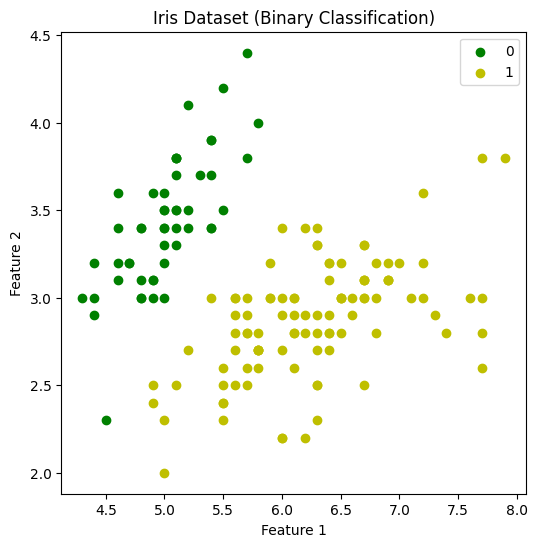

In [14]:
plt.figure(figsize=(6, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='g', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='y', label='1')
plt.legend()
plt.title("Iris Dataset (Binary Classification)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [15]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose

    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)

    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        self.theta = np.zeros(X.shape[1])
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            loss = self.__loss(h, y)
            if self.verbose and i % 10000 == 0:
                print(f'Loss at iteration {i}: {loss}')

    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        return self.__sigmoid(np.dot(X, self.theta))

    def predict(self, X):
        return self.predict_prob(X).round()

In [16]:
model = LogisticRegression(lr=0.1, num_iter=300000)
model.fit(X, y)

In [17]:
preds = model.predict(X)
accuracy = (preds == y).mean()
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%


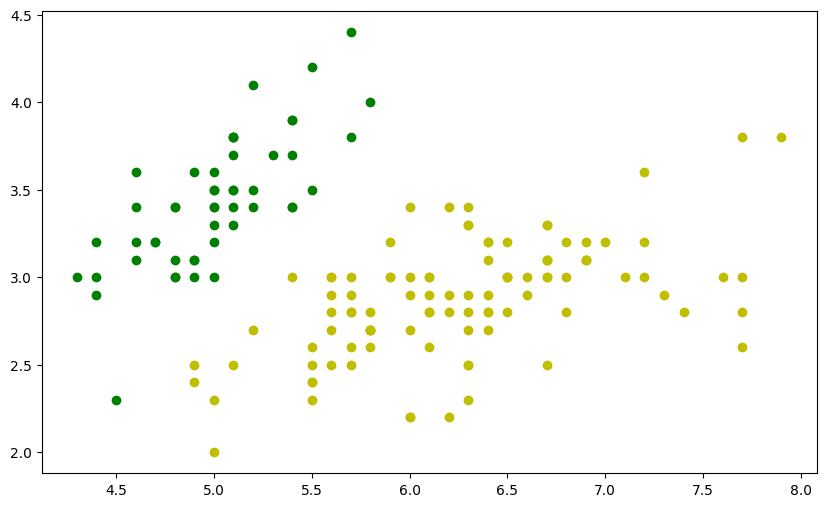

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='g', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='y', label='1')

In [19]:
x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))
grid = np.c_[xx1.ravel(), xx2.ravel()]

In [20]:
probs = model.predict_prob(grid).reshape(xx1.shape)

C:\Users\DELL\AppData\Local\Temp\ipykernel_6748\3781693503.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


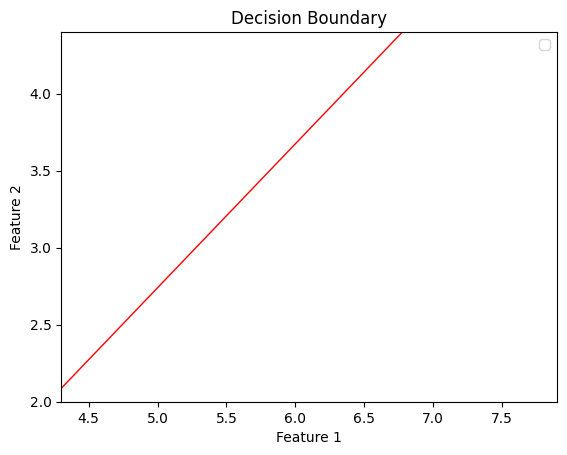

In [21]:
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='red')
plt.title("Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()